# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 630


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    units="metric"
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url+city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao gabriel da cachoeira
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | vadso
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | st. john's
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | la passe
Processing Record 12 of Set 1 | manado
Processing Record 13 of Set 1 | constantia
Processing Record 14 of Set 1 | santa cruz
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | babu
Processing Record 17 of Set 1 | lexington
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | aberdeen
Processing Record 22 of Set 1 | villa em

City not found. Skipping...
Processing Record 38 of Set 4 | ghanzi
Processing Record 39 of Set 4 | tazovsky
Processing Record 40 of Set 4 | papatowai
Processing Record 41 of Set 4 | caleta de carquin
Processing Record 42 of Set 4 | casper
Processing Record 43 of Set 4 | axim
Processing Record 44 of Set 4 | pisco
Processing Record 45 of Set 4 | biltine
Processing Record 46 of Set 4 | wailua homesteads
Processing Record 47 of Set 4 | kittila
Processing Record 48 of Set 4 | san antonio del estrecho
City not found. Skipping...
Processing Record 49 of Set 4 | takoradi
Processing Record 50 of Set 4 | kukmor
Processing Record 1 of Set 5 | raahe
Processing Record 2 of Set 5 | alice springs
Processing Record 3 of Set 5 | san patricio
Processing Record 4 of Set 5 | bikenibeu village
Processing Record 5 of Set 5 | pontes e lacerda
Processing Record 6 of Set 5 | ilebo
Processing Record 7 of Set 5 | prado
Processing Record 8 of Set 5 | hermanus
Processing Record 9 of Set 5 | rice lake
Processing Re

City not found. Skipping...
Processing Record 30 of Set 8 | nuuk
Processing Record 31 of Set 8 | kodyma
Processing Record 32 of Set 8 | kupang
Processing Record 33 of Set 8 | cassilandia
Processing Record 34 of Set 8 | christchurch
Processing Record 35 of Set 8 | ulladulla
Processing Record 36 of Set 8 | kaiapoi
Processing Record 37 of Set 8 | choyr
Processing Record 38 of Set 8 | tralee
Processing Record 39 of Set 8 | howard springs
Processing Record 40 of Set 8 | boguchany
Processing Record 41 of Set 8 | micheldorf in oberosterreich
City not found. Skipping...
Processing Record 42 of Set 8 | bailen
Processing Record 43 of Set 8 | jerome
Processing Record 44 of Set 8 | rongelap
Processing Record 45 of Set 8 | keflavik
Processing Record 46 of Set 8 | ash shatrah
Processing Record 47 of Set 8 | gizo
Processing Record 48 of Set 8 | cartagena
Processing Record 49 of Set 8 | kuloy
Processing Record 50 of Set 8 | north bend
Processing Record 1 of Set 9 | panji
Processing Record 2 of Set 9 |

Processing Record 21 of Set 12 | mubi
Processing Record 22 of Set 12 | isla vista
Processing Record 23 of Set 12 | hithadhoo
Processing Record 24 of Set 12 | lycksele
Processing Record 25 of Set 12 | yambio
Processing Record 26 of Set 12 | kavarna
Processing Record 27 of Set 12 | iwanai
Processing Record 28 of Set 12 | puerto francisco de orellana
Processing Record 29 of Set 12 | rockland
Processing Record 30 of Set 12 | wakkanai
Processing Record 31 of Set 12 | kununurra
Processing Record 32 of Set 12 | nizhniy odes
Processing Record 33 of Set 12 | great falls
Processing Record 34 of Set 12 | barentu
Processing Record 35 of Set 12 | andergrove
Processing Record 36 of Set 12 | betio village
Processing Record 37 of Set 12 | novyy urengoy
Processing Record 38 of Set 12 | saldanha
Processing Record 39 of Set 12 | qapqal
City not found. Skipping...
Processing Record 40 of Set 12 | homer
Processing Record 41 of Set 12 | as saffaniyah
Processing Record 42 of Set 12 | igarape acu
Processing R

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          603
Lat           603
Lng           603
Max Temp      603
Humidity      603
Cloudiness    603
Wind Speed    603
Country       603
Date          603
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sao gabriel da cachoeira,-0.1303,-67.0892,24.02,98,100,0.37,BR,1702167356
1,iqaluit,63.7506,-68.5145,-5.15,86,100,4.63,CA,1702167431
2,bethel,41.3712,-73.4140,10.11,87,100,0.45,US,1702167401
3,vadso,70.0744,29.7487,-11.91,85,100,7.20,NO,1702167480
4,adamstown,-25.0660,-130.1015,21.72,78,100,4.76,PN,1702167589


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sao gabriel da cachoeira,-0.1303,-67.0892,24.02,98,100,0.37,BR,1702167356
1,iqaluit,63.7506,-68.5145,-5.15,86,100,4.63,CA,1702167431
2,bethel,41.3712,-73.4140,10.11,87,100,0.45,US,1702167401
3,vadso,70.0744,29.7487,-11.91,85,100,7.20,NO,1702167480
4,adamstown,-25.0660,-130.1015,21.72,78,100,4.76,PN,1702167589


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

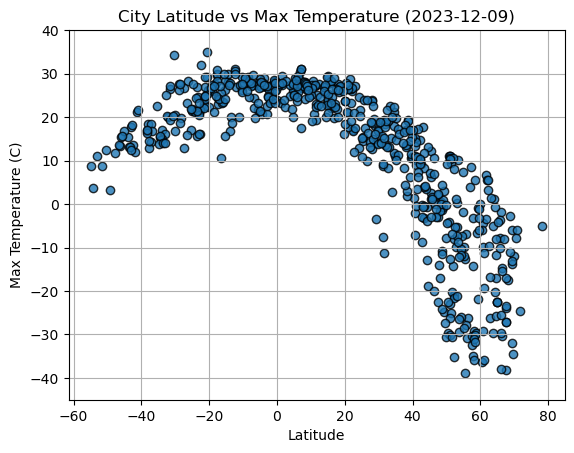

In [37]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha =0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Max Temperature (2023-12-09)")
plt.ylim(-45, 40)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

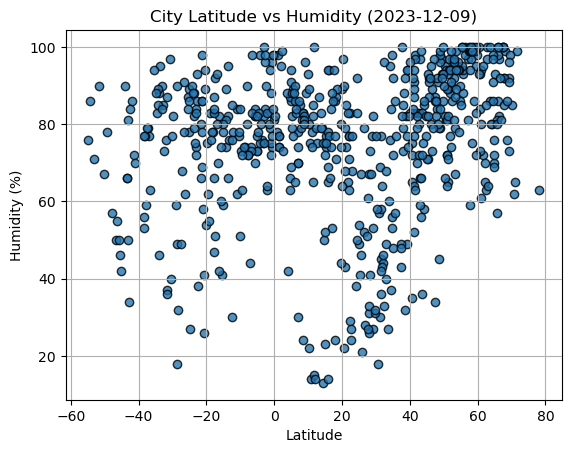

In [40]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha = 0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2023-12-09)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

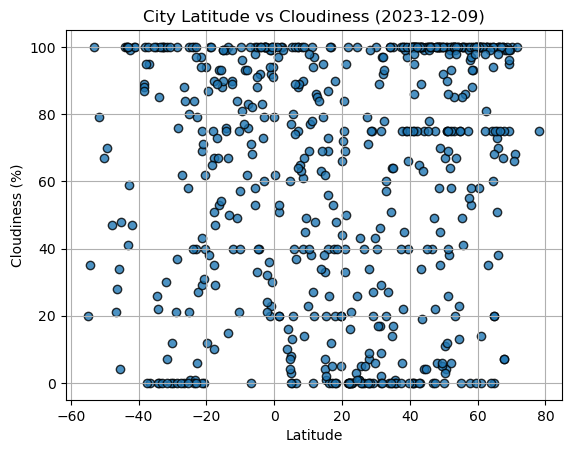

In [42]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha = 0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (2023-12-09)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

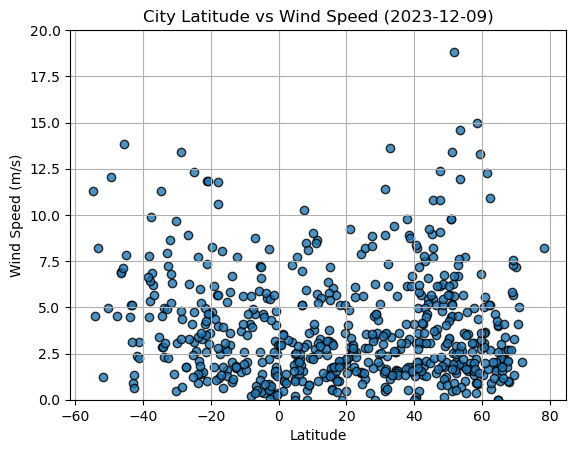

In [44]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha = 0.8)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed (2023-12-09)")
plt.grid(True)
plt.ylim(0, 20)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [57]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,iqaluit,63.7506,-68.5145,-5.15,86,100,4.63,CA,1702167431
2,bethel,41.3712,-73.4140,10.11,87,100,0.45,US,1702167401
3,vadso,70.0744,29.7487,-11.91,85,100,7.20,NO,1702167480
7,ilulissat,69.2167,-51.1000,-5.99,73,75,5.66,GL,1702167453
8,st. john's,47.5649,-52.7093,2.10,87,75,12.35,CA,1702167567


In [58]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sao gabriel da cachoeira,-0.1303,-67.0892,24.02,98,100,0.37,BR,1702167356
4,adamstown,-25.0660,-130.1015,21.72,78,100,4.76,PN,1702167589
5,waitangi,-43.9535,-176.5597,15.46,90,100,4.47,NZ,1702167589
6,bredasdorp,-34.5322,20.0403,15.46,83,26,2.85,ZA,1702167418
13,santa cruz,-17.8000,-63.1667,29.57,47,10,4.01,BO,1702166942


###  Temperature vs. Latitude Linear Regression Plot

In [65]:
plt.scatter(northern_hemi_df["Lat"], (slope['Max Temp']) * northern_hemi_df["Max Temp"])

# Incorporate the other graph properties
#plt.xlabel("Latitude")
#plt.ylabel("Max Temperature (C)")
#plt.title("City Latitude vs Max Temperature (2023-12-09)")


# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

IndexError: invalid index to scalar variable.

The r-value is: 0.7161472181434118


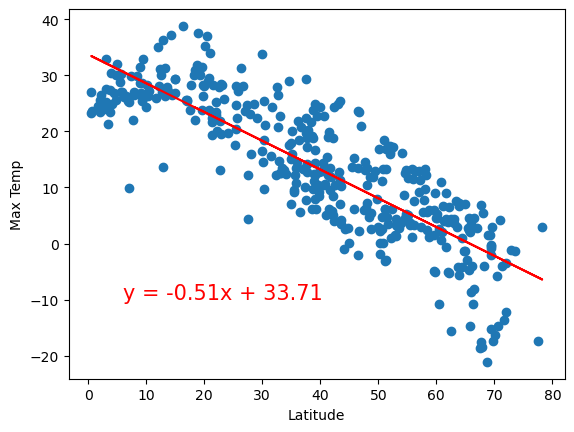

In [15]:
# Linear regression on Northern Hemisphere


The r-value is: 0.4121057168607245


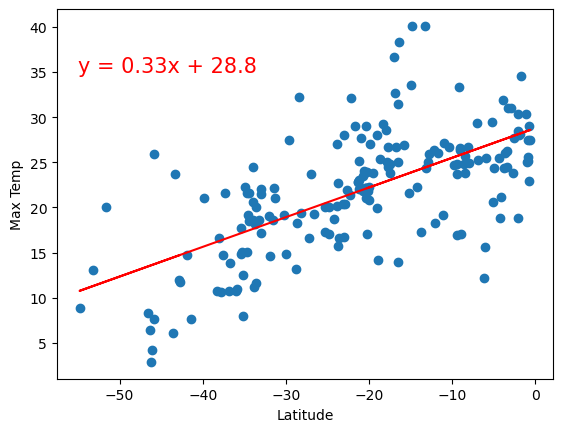

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


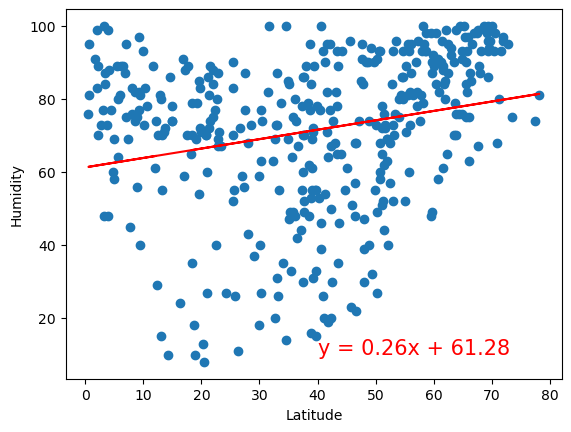

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


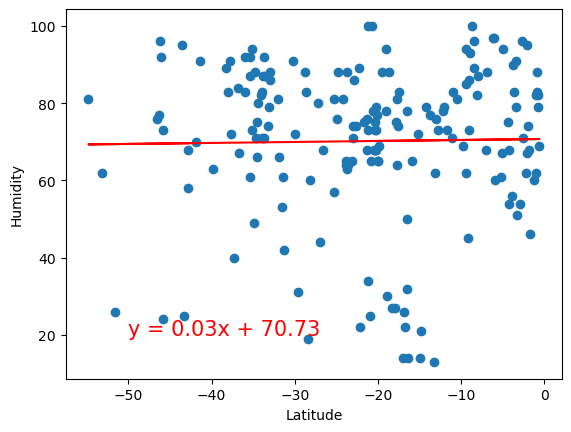

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


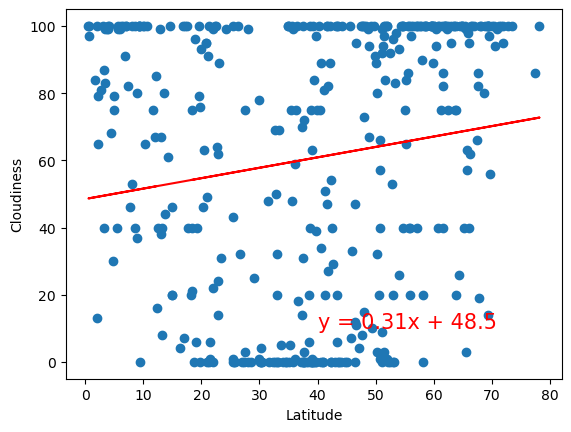

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


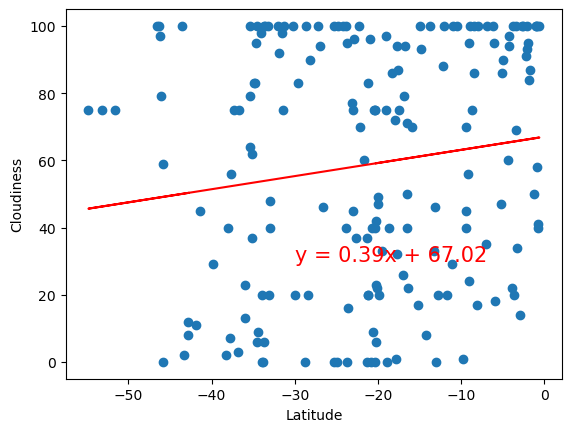

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


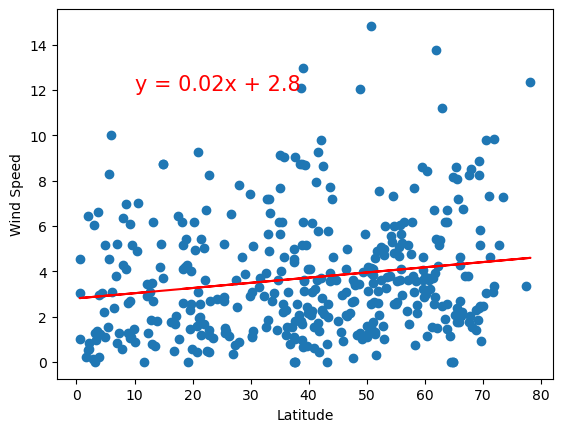

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


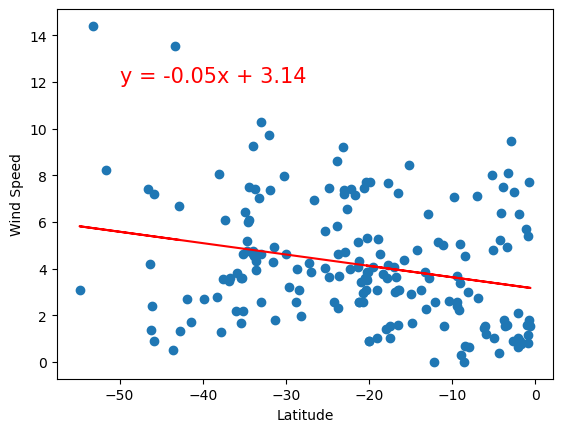

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE